In [1]:
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_dataset(file_path):
    return pd.read_csv(file_path)

os.chdir('/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings')

os.getcwd()

'/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings'

In [4]:
latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/latest_match_data_positions_fixed_home_away_FIXED_value_scores_ADDED_AUGUST_11.csv')
latest_match_data = latest_match_data[latest_match_data['value_score_nan_boolean'] == 0]
latest_match_data = latest_match_data[latest_match_data['Match Result Changed'] != True]
latest_match_data = latest_match_data.drop(columns=['Unnamed: 0'])

In [3]:
#OLD DATA CODE - WE USED THIS ALREADY AND DONT NEED TO RUN THIS AGAIN

# Load your data
latest_match_data = pd.read_csv('create_dataset_1/CSVs we use often/latest_match_data_july_12_superstar_info_recalculated.csv') #latest_data_ranking_difference__Mv_difference_opposite
latest_match_data.drop(columns=['Unnamed: 0'], inplace=True)

#lates_data_ranking_difference__Mv_difference_opposite.csv



# Calculate win percentage for the more valuable team
latest_match_data['mv_difference_abs'] = latest_match_data['Market.Value.Difference'].abs()
# Assuming 'latest_match_data' is already loaded
latest_match_data['MV_Prediction_Correct'] = np.where(
    (latest_match_data['Market.Value.Difference'] < 0) & (latest_match_data['Score.Difference'] < 0), 1,
    np.where(
        (latest_match_data['Market.Value.Difference'] > 0) & (latest_match_data['Score.Difference'] > 0), 1, 0
    )
)
latest_match_data['smaller_team_value'] = latest_match_data[['Team.1.Total.Market.Value', 'Team.2.Total.Market.Value']].min(axis=1)

# Calculate win percentage for the more valuable team
latest_match_data['rank_difference_abs'] = latest_match_data['Rank.Difference'].abs()
# Assuming 'latest_match_data' is already loaded
latest_match_data['rank_prediction_correct'] = np.where(
    (latest_match_data['Rank.Difference'] < 0) & (latest_match_data['Score.Difference'] < 0), 1,
    np.where(
        (latest_match_data['Rank.Difference'] > 0) & (latest_match_data['Score.Difference'] > 0), 1, 0
    )
)
latest_match_data['smaller_team_rank'] = latest_match_data[['Team.1.Rank', 'Team.2.Rank']].max(axis=1)

latest_match_data['Team 1, Total Global Superstars'] = latest_match_data['Team 1, Tier 1 Global Superstars'] + latest_match_data['Team 1, Tier 2 Global Superstars']
latest_match_data['Team 2, Total Global Superstars'] = latest_match_data['Team 2, Tier 1 Global Superstars'] + latest_match_data['Team 2, Tier 2 Global Superstars']

latest_match_data['Global_Superstar_difference'] = latest_match_data['Team 1, Total Global Superstars'] - latest_match_data['Team 2, Total Global Superstars']
latest_match_data['Global_Superstar_difference_abs'] = latest_match_data['Global_Superstar_difference'].abs()
latest_match_data['Global_Superstar_difference_prediction_correct'] = np.where(
    (latest_match_data['Global_Superstar_difference'] < 0) & (latest_match_data['Score.Difference'] < 0), 1,
    np.where(
        (latest_match_data['Global_Superstar_difference'] > 0) & (latest_match_data['Score.Difference'] > 0), 1, 0
    )
)

latest_match_data['Global_Superstar_difference_prediction_correct_inverse'] = np.where(
    (latest_match_data['Global_Superstar_difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
    np.where(
        (latest_match_data['Global_Superstar_difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
    )
)


latest_match_data['Number_of_valuable_players_prediction_correct'] = np.where(
    (latest_match_data['Number.of.Valuable.Players.Difference'] < 0) & (latest_match_data['Score.Difference'] < 0), 1,
    np.where(
        (latest_match_data['Number.of.Valuable.Players.Difference'] > 0) & (latest_match_data['Score.Difference'] > 0), 1, 0
    )
)

latest_match_data['Number_of_valuable_players_prediction_correct_inverse'] = np.where(
    (latest_match_data['Number.of.Valuable.Players.Difference'] < 0) & (latest_match_data['Score.Difference'] > 0), 1,
    np.where(
        (latest_match_data['Number.of.Valuable.Players.Difference'] > 0) & (latest_match_data['Score.Difference'] < 0), 1, 0
    )
)

# Create the column less_valuable_team_FIFA_ranking
latest_match_data['less_valuable_team_FIFA_ranking'] = np.where(
    latest_match_data['Market.Value.Difference'] < 0,
    latest_match_data['Team.1.Rank'],
    np.where(
        latest_match_data['Market.Value.Difference'] > 0,
        latest_match_data['Team.2.Rank'],
        np.nan  # or any other value you prefer for the case when Market.Value.Difference is exactly 0
    )
)

# Create the column worse_ranked_team_value
latest_match_data['worse_ranked_team_value'] = np.where(
    latest_match_data['Rank.Difference'] < 0,
    latest_match_data['Team.1.Total.Market.Value'],
    np.where(
        latest_match_data['Rank.Difference'] > 0,
        latest_match_data['Team.2.Total.Market.Value'],
        np.nan  # or any other value you prefer for the case when Market.Value.Difference is exactly 0
    )
)

### Win % by number of super stars

#### Tier 1 Stars

for 0 stars: team 1 had 4132 games and team 2 had 4242 games
for 0 stars: 8374 games
for 1 stars: team 1 had 509 games and team 2 had 480 games
for 1 stars: 989 games
for 2 stars: team 1 had 173 games and team 2 had 143 games
for 2 stars: 316 games
for 3 stars: team 1 had 105 games and team 2 had 102 games
for 3 stars: 207 games
for 4 stars: team 1 had 97 games and team 2 had 83 games
for 4 stars: 180 games
for 5 stars: team 1 had 60 games and team 2 had 51 games
for 5 stars: 111 games
for 6 stars: team 1 had 36 games and team 2 had 19 games
for 6 stars: 55 games
for 7 stars: team 1 had 20 games and team 2 had 11 games
for 7 stars: 31 games
for 8 stars: team 1 had 13 games and team 2 had 14 games
for 8 stars: 27 games
for 9 stars: team 1 had 3 games and team 2 had 3 games
for 9 stars: 6 games


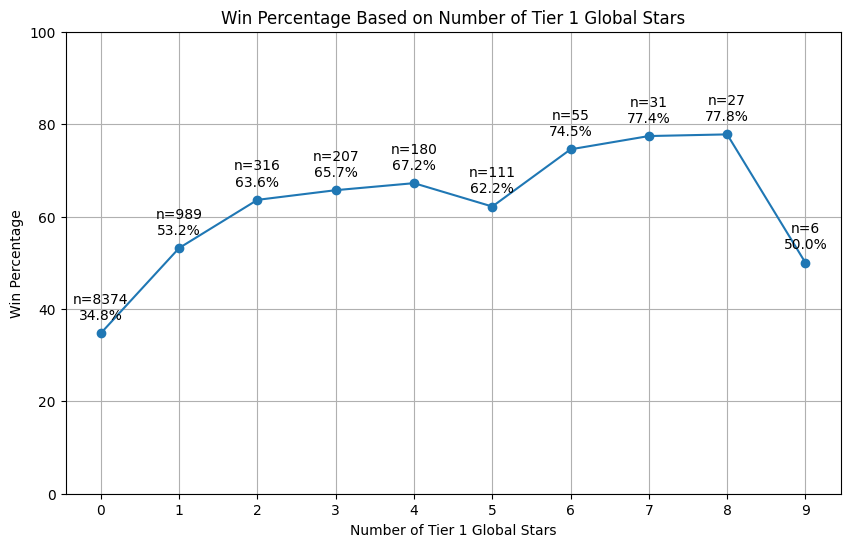

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionaries to store win percentages and sample sizes
win_percentages = {}
sample_sizes = {}

# Loop through the number of Tier 1 Global Stars from 0 to 9
for num_stars in range(10):
    # Filter the data for Team 1 and Team 2 having the specified number of Tier 1 Global Stars
    team1_data = latest_match_data[latest_match_data['Team 1, Tier 1 Global Superstars'] == num_stars]
    team2_data = latest_match_data[latest_match_data['Team 2, Tier 1 Global Superstars'] == num_stars]
    
    # Calculate win percentage for Team 1
    team1_wins = team1_data[team1_data['Score.Difference'] > 0].shape[0]
    team1_total = team1_data.shape[0]
    team1_win_percentage = (team1_wins / team1_total) * 100 if team1_total > 0 else 0
    
    # Calculate win percentage for Team 2
    team2_wins = team2_data[team2_data['Score.Difference'] < 0].shape[0]
    team2_total = team2_data.shape[0]
    team2_win_percentage = (team2_wins / team2_total) * 100 if team2_total > 0 else 0
    
    # Combine the win percentages
    total_wins = team1_wins + team2_wins
    total_games = team1_total + team2_total
    combined_win_percentage = (total_wins / total_games) * 100 if total_games > 0 else 0
    
    # Store the combined win percentage and sample size
    win_percentages[num_stars] = combined_win_percentage
    sample_sizes[num_stars] = total_games
    print(f"for {num_stars} stars: team 1 had {team1_total} games and team 2 had {team2_total} games")
    print(f'for {num_stars} stars: {total_games} games')

# Plot the win percentages
plt.figure(figsize=(10, 6))
plt.plot(list(win_percentages.keys()), list(win_percentages.values()), marker='o')
plt.title('Win Percentage Based on Number of Tier 1 Global Stars')
plt.xlabel('Number of Tier 1 Global Stars')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)  # Set Y-axis scale from 0 to 100
plt.xticks(np.arange(0, 10, 1))
plt.grid(True)

# Annotate the sample sizes and win percentages
for num_stars, win_percentage in win_percentages.items():
    plt.annotate(f'n={sample_sizes[num_stars]}\n{win_percentage:.1f}%', 
                 (num_stars, win_percentage), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

#### Tier 2 Stars

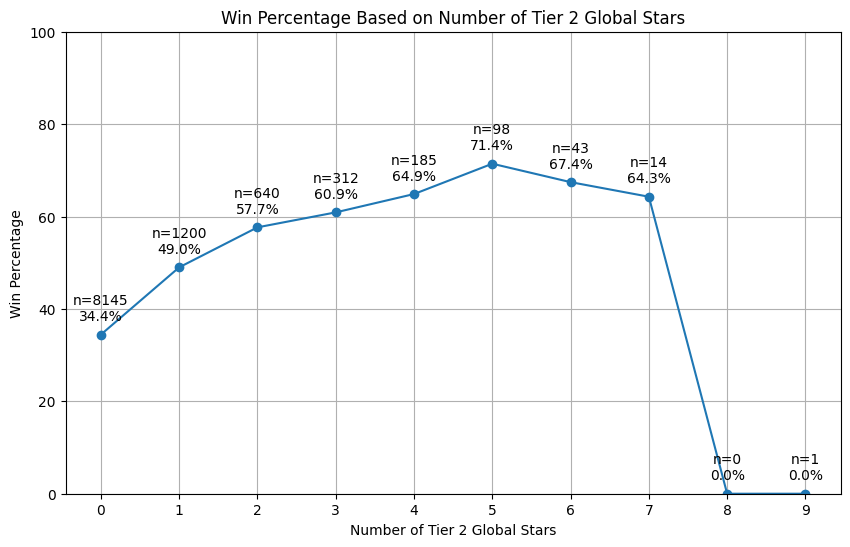

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionaries to store win percentages and sample sizes
win_percentages = {}
sample_sizes = {}

# Loop through the number of Tier 1 Global Stars from 0 to 9
for num_stars in range(10):
    # Filter the data for Team 1 and Team 2 having the specified number of Tier 1 Global Stars
    team1_data = latest_match_data[latest_match_data['Team 1, Tier 2 Global Superstars'] == num_stars]
    team2_data = latest_match_data[latest_match_data['Team 2, Tier 2 Global Superstars'] == num_stars]
    
    # Calculate win percentage for Team 1
    team1_wins = team1_data[team1_data['Score.Difference'] > 0].shape[0]
    team1_total = team1_data.shape[0]
    team1_win_percentage = (team1_wins / team1_total) * 100 if team1_total > 0 else 0
    
    # Calculate win percentage for Team 2
    team2_wins = team2_data[team2_data['Score.Difference'] < 0].shape[0]
    team2_total = team2_data.shape[0]
    team2_win_percentage = (team2_wins / team2_total) * 100 if team2_total > 0 else 0
    
    # Combine the win percentages
    total_wins = team1_wins + team2_wins
    total_games = team1_total + team2_total
    combined_win_percentage = (total_wins / total_games) * 100 if total_games > 0 else 0
    
    # Store the combined win percentage and sample size
    win_percentages[num_stars] = combined_win_percentage
    sample_sizes[num_stars] = total_games

# Plot the win percentages
plt.figure(figsize=(10, 6))
plt.plot(list(win_percentages.keys()), list(win_percentages.values()), marker='o')
plt.title('Win Percentage Based on Number of Tier 2 Global Stars')
plt.xlabel('Number of Tier 2 Global Stars')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)  # Set Y-axis scale from 0 to 100
plt.xticks(np.arange(0, 10, 1))
plt.grid(True)

# Annotate the sample sizes and win percentages
for num_stars, win_percentage in win_percentages.items():
    plt.annotate(f'n={sample_sizes[num_stars]}\n{win_percentage:.1f}%', 
                 (num_stars, win_percentage), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

### Tier 1 + Tier 2

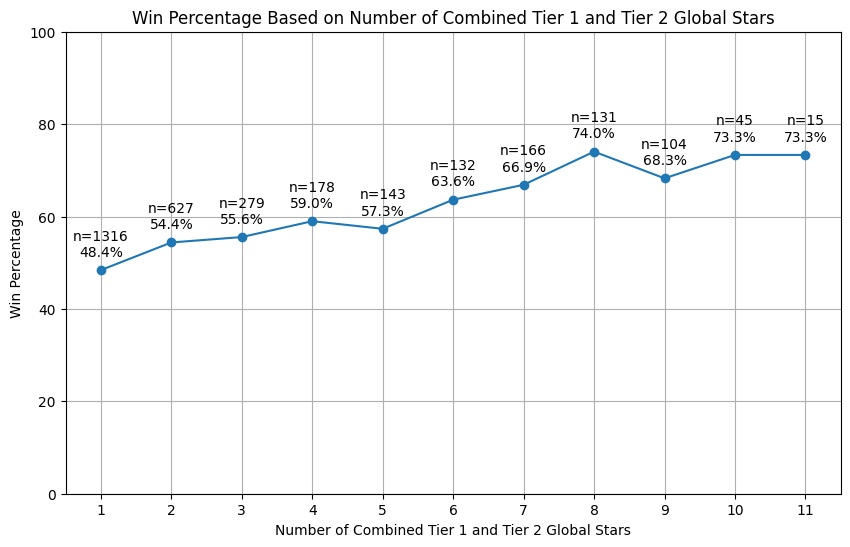

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionaries to store win percentages and sample sizes
win_percentages = {}
sample_sizes = {}

# Loop through the number of combined Tier 1 and Tier 2 Global Stars from 1 to 11
for num_stars in range(1, 12):
    # Filter the data for Team 1 and Team 2 having the specified number of Total Global Superstars
    team1_data = latest_match_data[latest_match_data['Team 1, Total Global Superstars'] == num_stars]
    team2_data = latest_match_data[latest_match_data['Team 2, Total Global Superstars'] == num_stars]
    
    # Calculate win percentage for Team 1
    team1_wins = team1_data[team1_data['Score.Difference'] > 0].shape[0]
    team1_total = team1_data.shape[0]
    team1_win_percentage = (team1_wins / team1_total) * 100 if team1_total > 0 else 0
    
    # Calculate win percentage for Team 2
    team2_wins = team2_data[team2_data['Score.Difference'] < 0].shape[0]
    team2_total = team2_data.shape[0]
    team2_win_percentage = (team2_wins / team2_total) * 100 if team2_total > 0 else 0
    
    # Combine the win percentages
    total_wins = team1_wins + team2_wins
    total_games = team1_total + team2_total
    combined_win_percentage = (total_wins / total_games) * 100 if total_games > 0 else 0
    
    # Store the combined win percentage and sample size
    win_percentages[num_stars] = combined_win_percentage
    sample_sizes[num_stars] = total_games

# Plot the win percentages
plt.figure(figsize=(10, 6))
plt.plot(list(win_percentages.keys()), list(win_percentages.values()), marker='o')
plt.title('Win Percentage Based on Number of Combined Tier 1 and Tier 2 Global Stars')
plt.xlabel('Number of Combined Tier 1 and Tier 2 Global Stars')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)  # Set Y-axis scale from 0 to 100
plt.xticks(np.arange(1, 12, 1))
plt.grid(True)

# Annotate the sample sizes and win percentages
for num_stars, win_percentage in win_percentages.items():
    plt.annotate(f'n={sample_sizes[num_stars]}\n{win_percentage:.1f}%', 
                 (num_stars, win_percentage), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

### Difference number

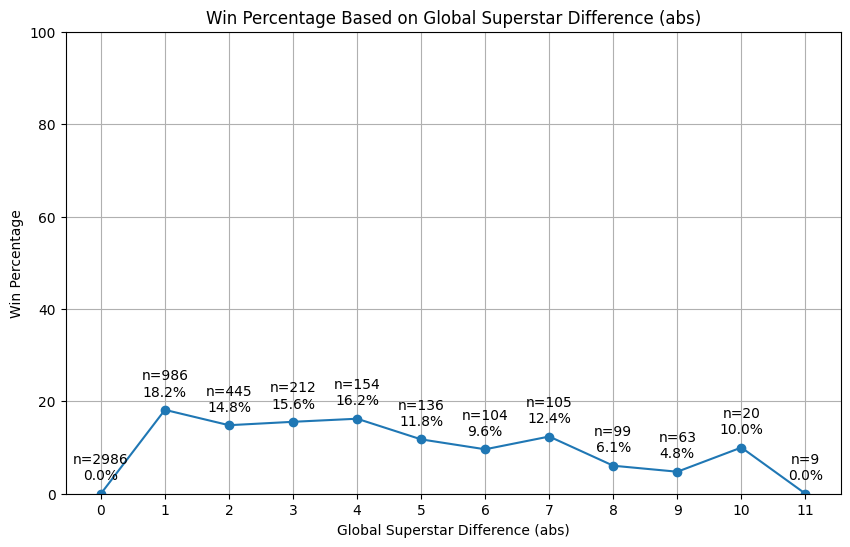

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize dictionaries to store win percentages and sample sizes
win_percentages = {}
sample_sizes = {}

# Loop through the levels of Global_Superstar_difference_abs
for num_stars in range(12):  # Assuming the range is from 0 to 11
    # Filter the data for the specified level of Global_Superstar_difference_abs
    subset_data = latest_match_data[latest_match_data['Global_Superstar_difference_abs'] == num_stars]

    correct_side_1 = subset_data[(subset_data['Global_Superstar_difference'] < 0) & (subset_data['Score.Difference'] < 0)]['Global_Superstar_difference_prediction_correct'].sum()
    correct_side_2 = subset_data[(subset_data['Global_Superstar_difference'] > 0) & (subset_data['Score.Difference'] > 0)]['Global_Superstar_difference_prediction_correct'].sum()

    incorrect_side_1 = subset_data[(subset_data['Global_Superstar_difference'] < 0) & (subset_data['Score.Difference'] > 0)]['Global_Superstar_difference_prediction_correct_inverse'].sum()
    incorrect_side_2 = subset_data[(subset_data['Global_Superstar_difference'] > 0) & (subset_data['Score.Difference'] < 0)]['Global_Superstar_difference_prediction_correct_inverse'].sum()
    
    # Calculate the sum of Global_Superstar_difference_prediction_correct_inverse for rows where Global_Superstar_difference > 0
    correct_inverse_sum = incorrect_side_1 + incorrect_side_2
    
    # Calculate the sum of Global_Superstar_difference_prediction_correct for rows where Global_Superstar_difference < 0
    correct_sum = correct_side_1 + correct_side_2
    
    # Combine the sums
    total_correct = correct_inverse_sum + correct_sum
    total_games = len(subset_data)
    
    # Calculate the combined win percentage
    combined_win_percentage = (correct_inverse_sum / total_games) * 100 if total_games > 0 else 0
    
    # Store the combined win percentage and sample size
    win_percentages[num_stars] = combined_win_percentage
    sample_sizes[num_stars] = total_games

# Plot the win percentages
plt.figure(figsize=(10, 6))
plt.plot(list(win_percentages.keys()), list(win_percentages.values()), marker='o')
plt.title('Win Percentage Based on Global Superstar Difference (abs)')
plt.xlabel('Global Superstar Difference (abs)')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)  # Set Y-axis scale from 0 to 100
plt.xticks(np.arange(0, 12, 1))
plt.grid(True)

# Annotate the sample sizes and win percentages
for num_stars, win_percentage in win_percentages.items():
    plt.annotate(f'n={sample_sizes[num_stars]}\n{win_percentage:.1f}%', 
                 (num_stars, win_percentage), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.show()

### histograms

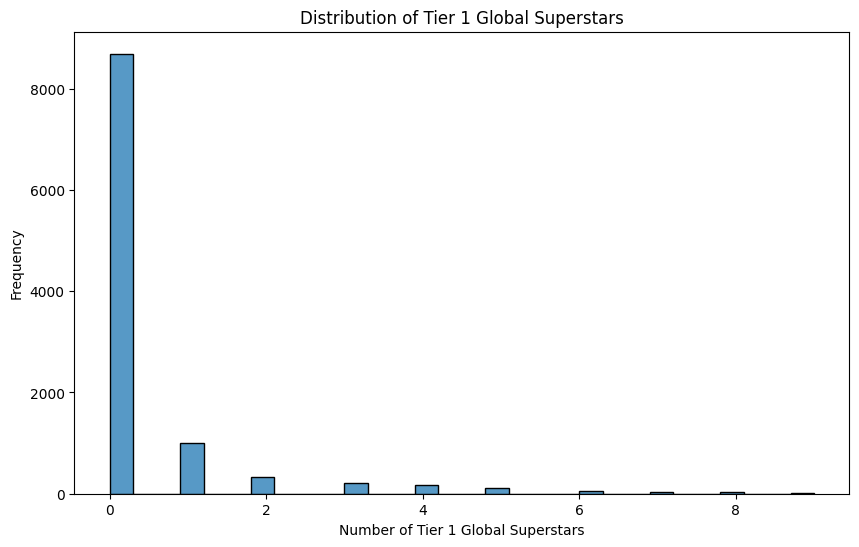

In [12]:
# Combine data for Tier 1 Global Superstars
combined_tier1_global = pd.concat([latest_match_data['Team 1, Tier 1 Global Superstars'], latest_match_data['Team 2, Tier 1 Global Superstars']])

# Distribution of Tier 1 Global Superstars
plt.figure(figsize=(10, 6))
sns.histplot(combined_tier1_global, bins=30, kde=False)
plt.title('Distribution of Tier 1 Global Superstars')
plt.xlabel('Number of Tier 1 Global Superstars')
plt.ylabel('Frequency')
plt.show()

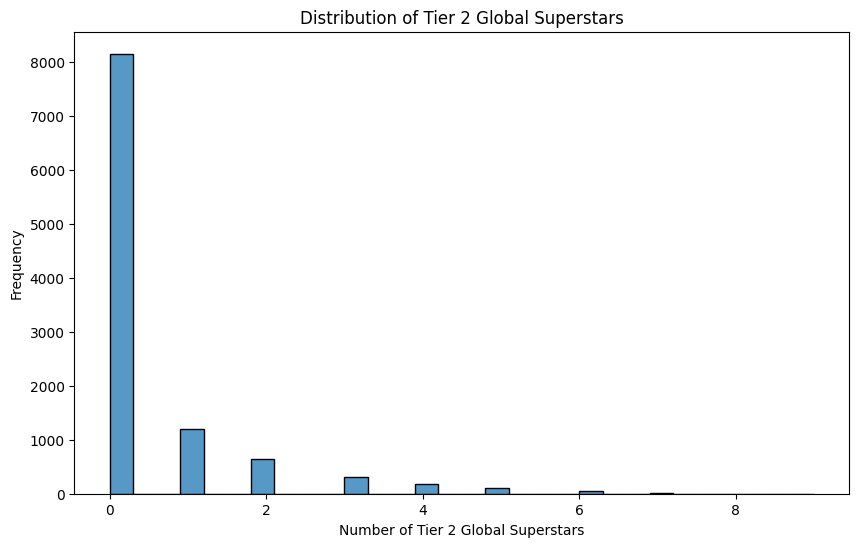

In [9]:
# Combine data for Tier 2 Global Superstars
combined_tier2_global = pd.concat([latest_match_data['Team 1, Tier 2 Global Superstars'], latest_match_data['Team 2, Tier 2 Global Superstars']])

# Distribution of Tier 2 Global Superstars
plt.figure(figsize=(10, 6))
sns.histplot(combined_tier2_global, bins=30, kde=False)
plt.title('Distribution of Tier 2 Global Superstars')
plt.xlabel('Number of Tier 2 Global Superstars')
plt.ylabel('Frequency')
plt.show()

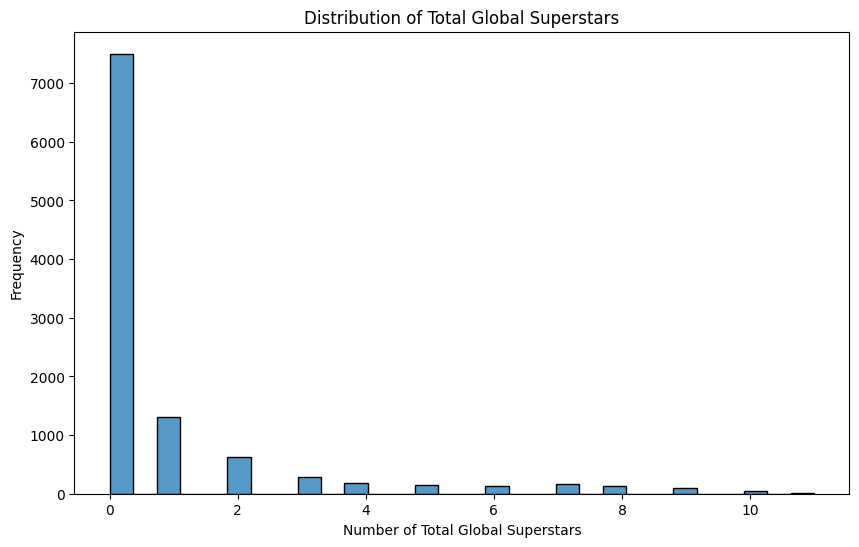

In [13]:
# Create new columns for total global superstars
latest_match_data['Team 1, Total Global Superstars'] = latest_match_data['Team 1, Tier 1 Global Superstars'] + latest_match_data['Team 1, Tier 2 Global Superstars']
latest_match_data['Team 2, Total Global Superstars'] = latest_match_data['Team 2, Tier 1 Global Superstars'] + latest_match_data['Team 2, Tier 2 Global Superstars']

# Combine data for Total Global Superstars
combined_total_global = pd.concat([latest_match_data['Team 1, Total Global Superstars'], latest_match_data['Team 2, Total Global Superstars']])

# Distribution of Total Global Superstars
plt.figure(figsize=(10, 6))
sns.histplot(combined_total_global, bins=30, kde=False)
plt.title('Distribution of Total Global Superstars')
plt.xlabel('Number of Total Global Superstars')
plt.ylabel('Frequency')
plt.show()

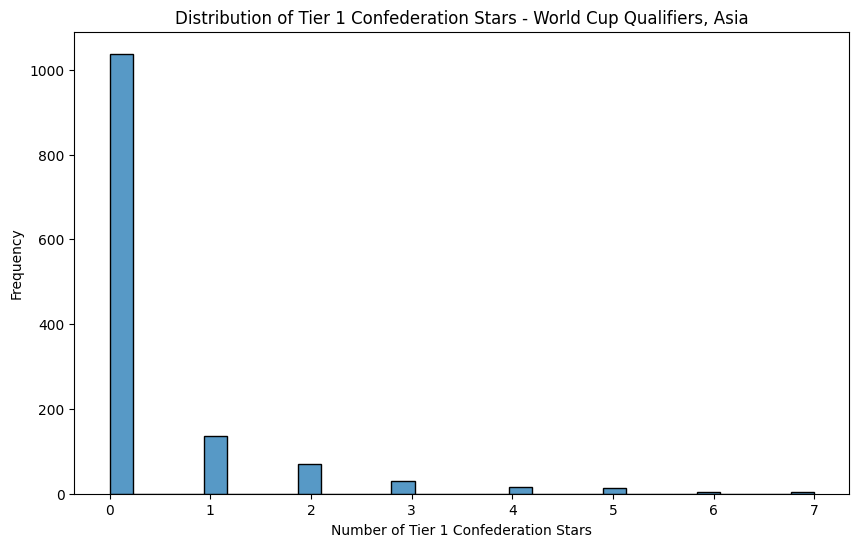

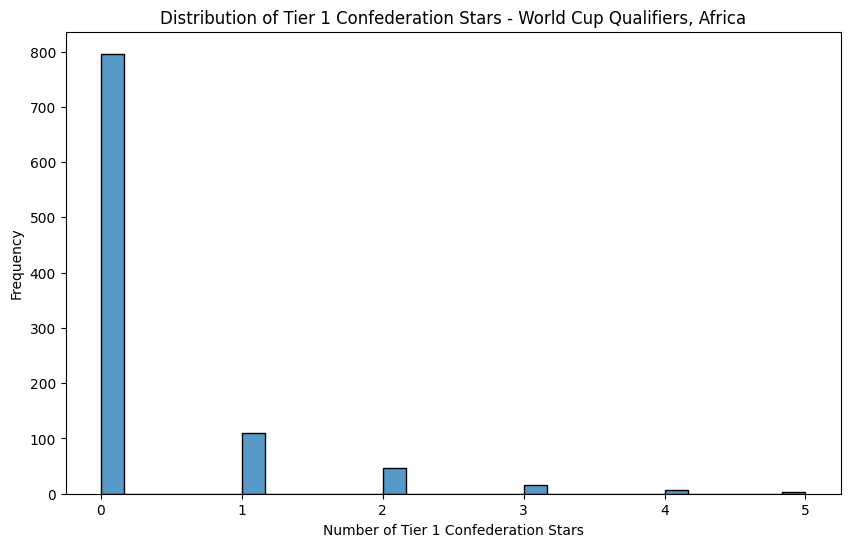

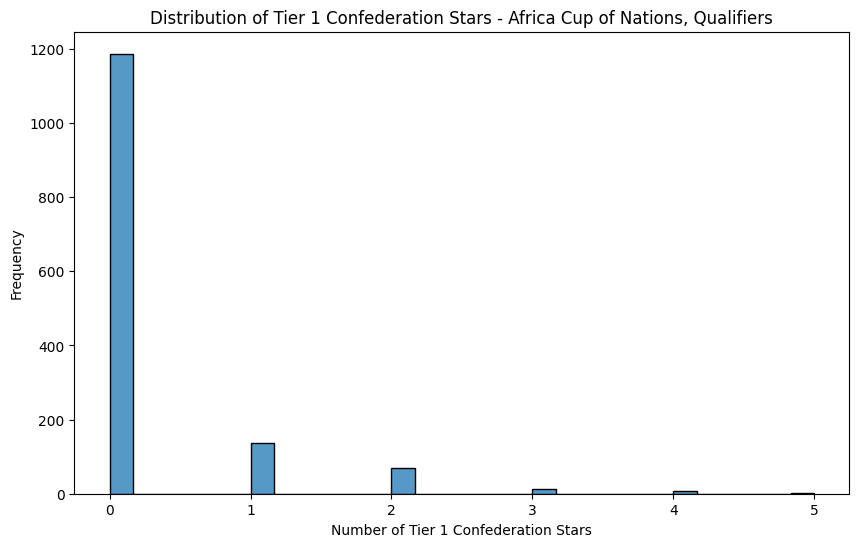

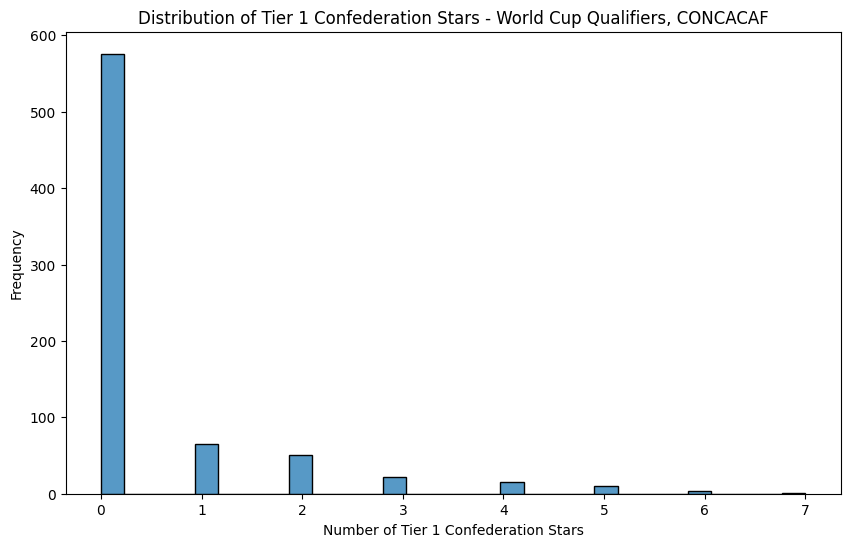

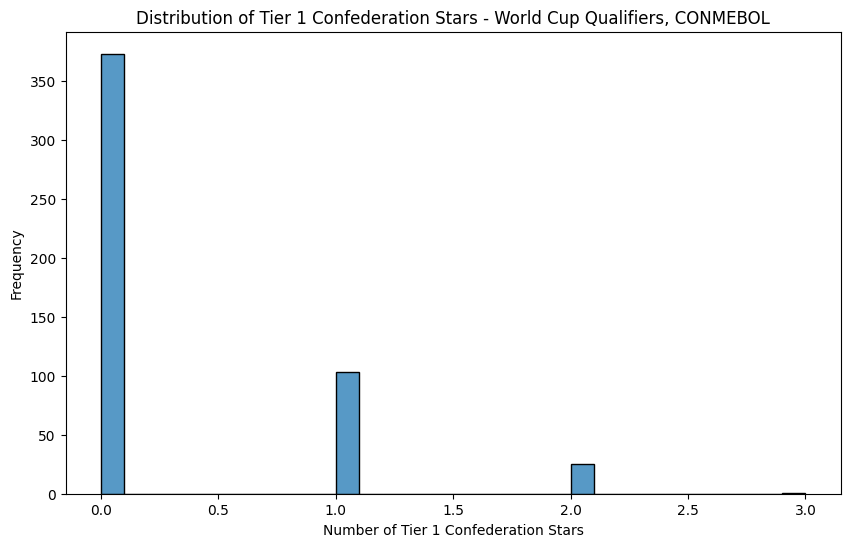

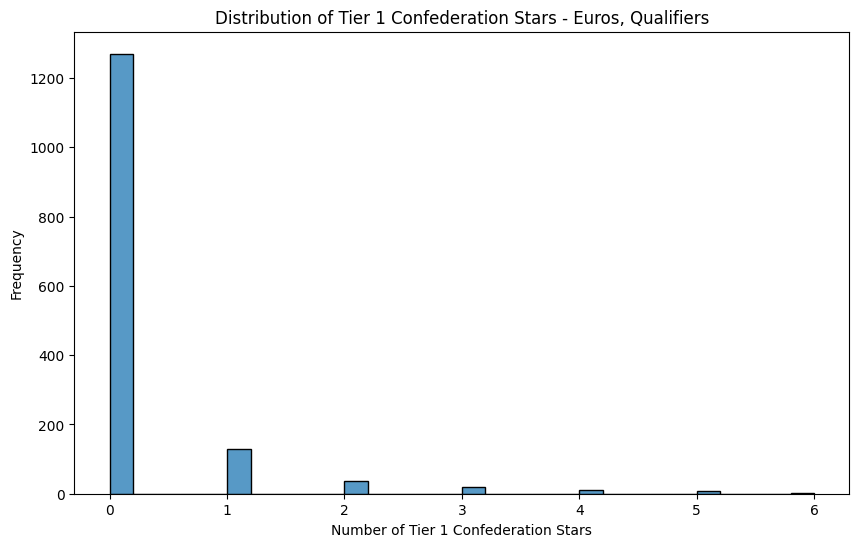

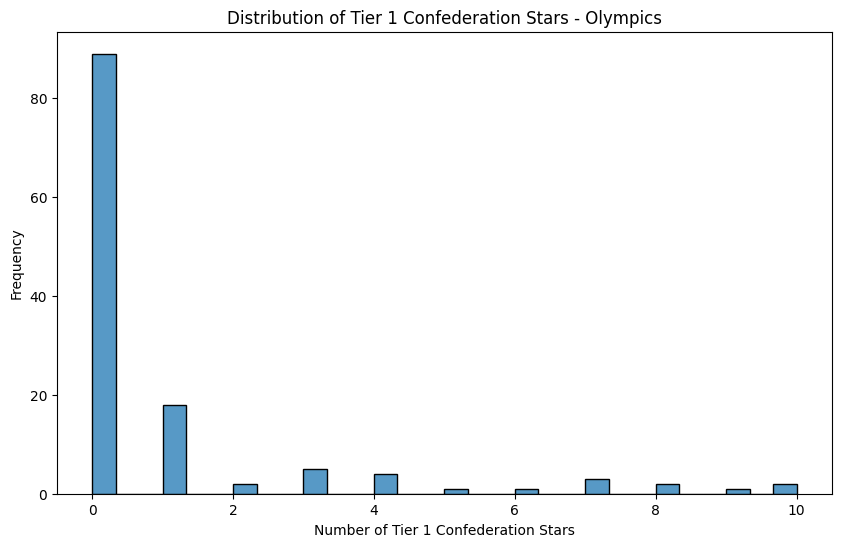

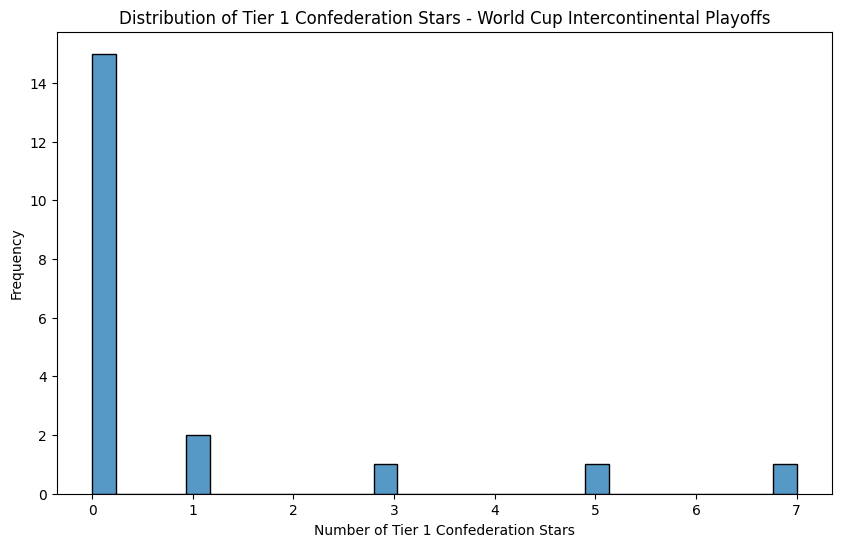

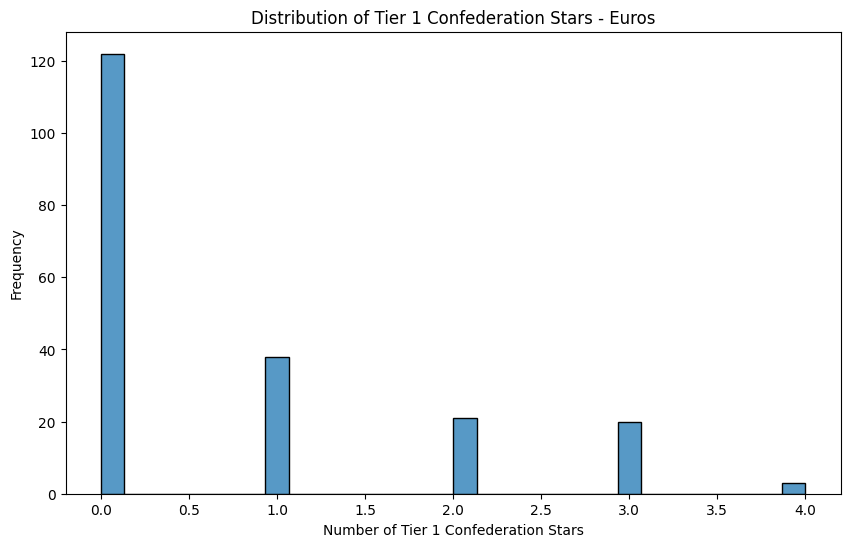

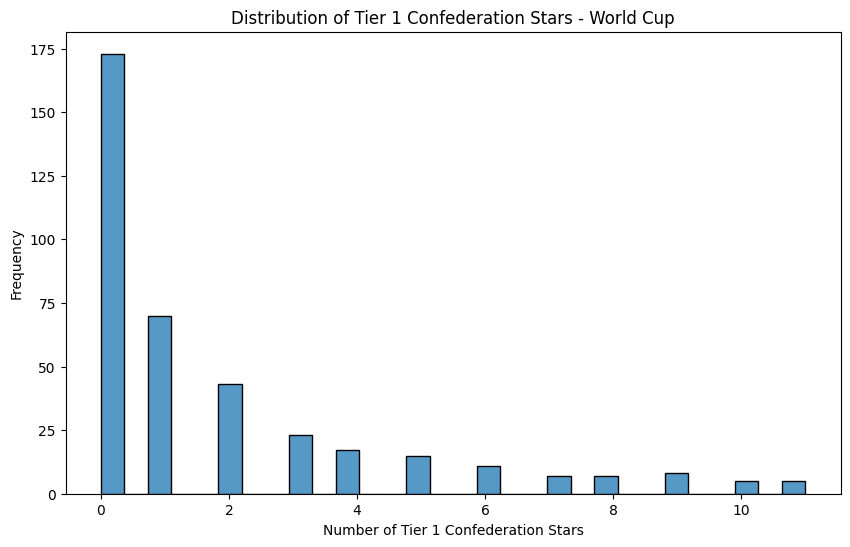

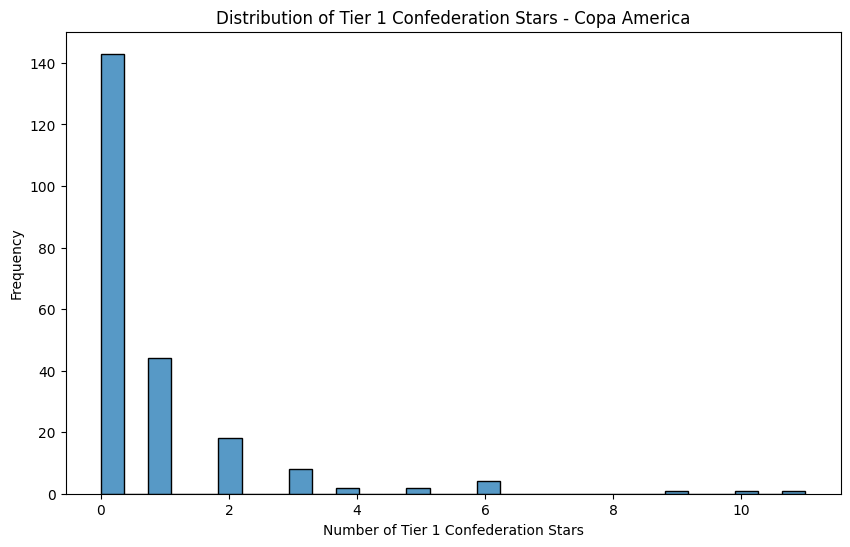

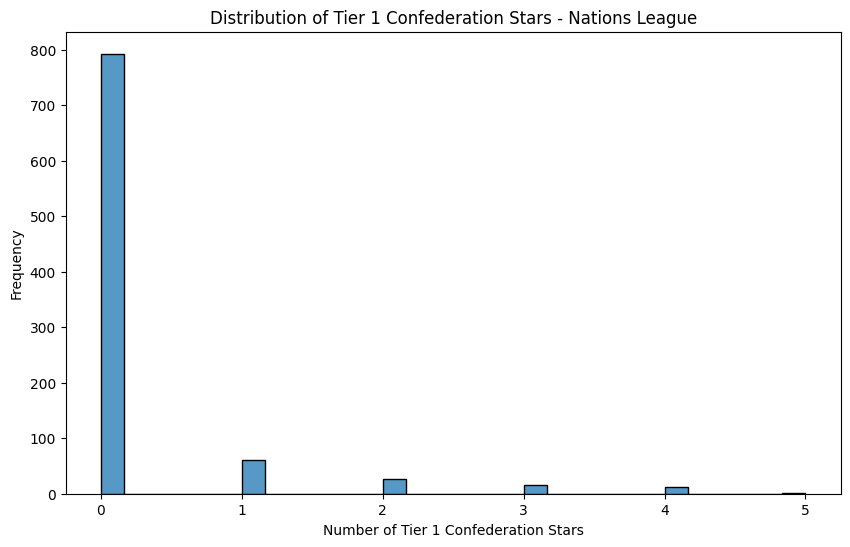

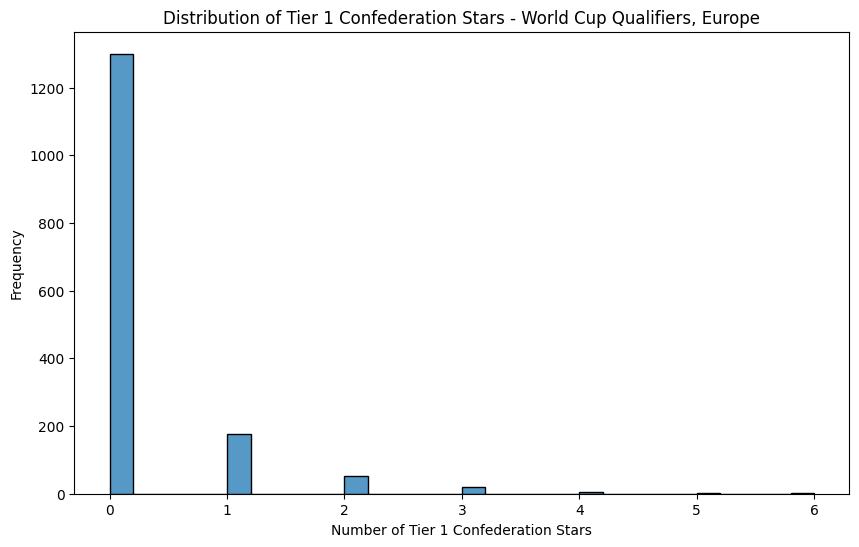

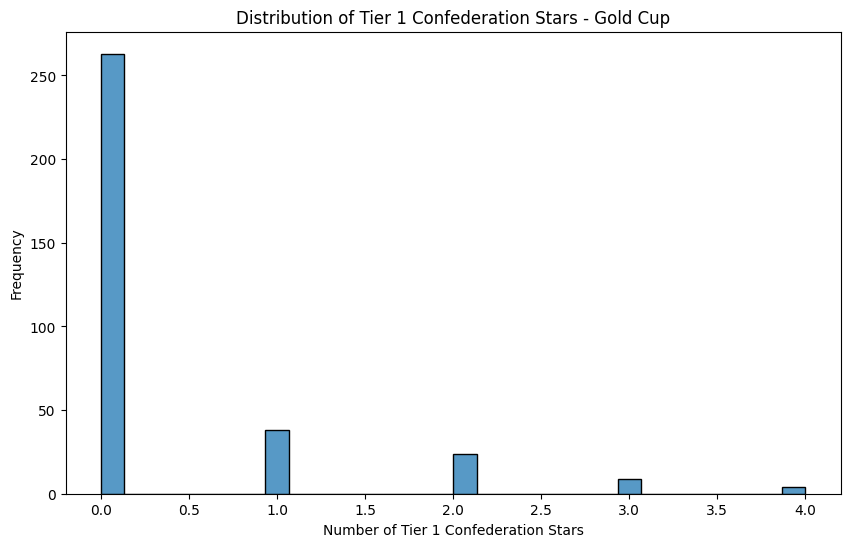

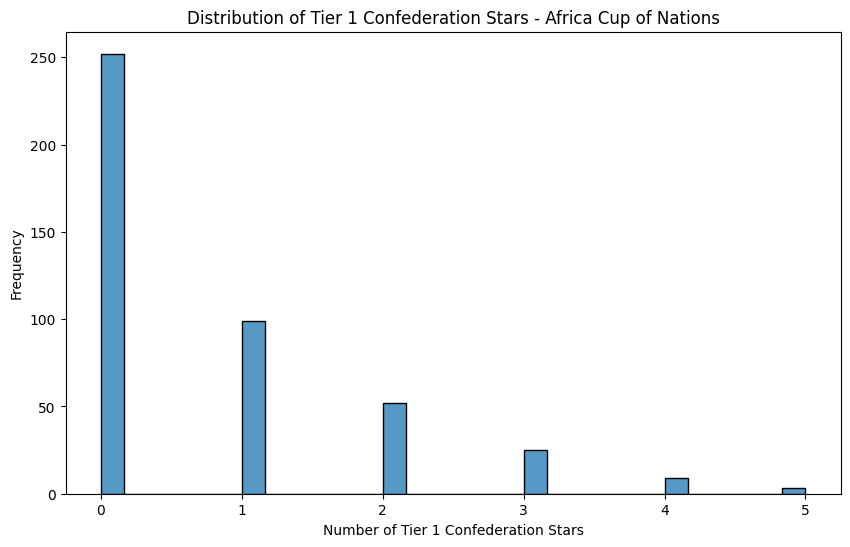

In [14]:
# Get unique competitions
competitions = latest_match_data['Competition'].unique()

# Plot for each competition
for competition in competitions:
    competition_data = latest_match_data[latest_match_data['Competition'] == competition]
    combined_tier1_confederation = pd.concat([competition_data['Team 1, Tier 1 Confederation Stars'], competition_data['Team 2, Tier 1 Confederation Stars']])
    
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_tier1_confederation, bins=30, kde=False)
    plt.title(f'Distribution of Tier 1 Confederation Stars - {competition}')
    plt.xlabel('Number of Tier 1 Confederation Stars')
    plt.ylabel('Frequency')
    plt.show()